# WORLD INDICATORS

In [1]:
# allows to import own functions
import sys, os
path_name = os.getcwd()
root_project = os.path.split(path_name)[0]
sys.path.append(root_project)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from src.utils.help_func import extract_indicator, last_values
from pandas_profiling import ProfileReport
import networkx as nx
import json

sns.set()
%matplotlib inline

In [3]:
df = pd.read_csv('../data/raw/world_indicators_data.csv')
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN,NaN
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN,NaN
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,95.939242,95.962166,96.352930,95.997833,96.649916,96.834184,97.003974,NaN,NaN,NaN
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.260538,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377251,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.NEGL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,21.400000,NaN,NaN,NaN,21.400000,NaN,NaN,NaN,NaN,NaN
377252,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.900000,NaN,NaN,NaN,14.500000,NaN,NaN,NaN,NaN,NaN
377253,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.900000,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,NaN
377254,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,30.500000,NaN,NaN,33.500000,32.400000,NaN,NaN,NaN,NaN,NaN


In [4]:
print(f"I have information about {df['Country Code'].nunique()} different countries")

I have information about 264 different countries


## POPULATION

Utilizo la función propia extract_indicator para extraer la información que quiero del dataframe.

In [5]:
df_male = extract_indicator(df, 'Population, male')
df_male

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,46481711.0,47755357.0,49069200.0,50427059.0,51834277.0,53294863.0,54815954.0,56398146.0,...,1.877729e+08,1.921145e+08,1.964036e+08,2.006613e+08,2.049045e+08,2.091214e+08,2.133009e+08,2.174921e+08,NaN,NaN
1,Caribbean small states,CSS,1989129.0,2026003.0,2063524.0,2101315.0,2138825.0,2175665.0,2211761.0,2247180.0,...,3.423527e+06,3.448597e+06,3.473843e+06,3.498727e+06,3.522855e+06,3.546029e+06,3.568269e+06,3.589576e+06,NaN,NaN
2,Central Europe and the Baltics,CEB,44242523.0,44678835.0,45087687.0,45521035.0,45973385.0,46348875.0,46710858.0,47162521.0,...,5.031252e+07,5.021726e+07,5.013248e+07,5.004843e+07,4.995038e+07,4.983553e+07,4.972029e+07,4.961555e+07,NaN,NaN
3,Early-demographic dividend,EAR,499884835.0,511764752.0,524057471.0,536732006.0,549804100.0,563263634.0,577104086.0,591358958.0,...,1.504720e+09,1.526369e+09,1.547897e+09,1.569362e+09,1.590795e+09,1.612170e+09,1.633457e+09,1.654720e+09,NaN,NaN
4,East Asia & Pacific,EAS,529519689.0,531035336.0,538210979.0,551209885.0,564017034.0,577357703.0,592453217.0,606905059.0,...,1.127517e+09,1.135075e+09,1.142608e+09,1.150210e+09,1.157772e+09,1.165478e+09,1.173190e+09,1.180036e+09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Virgin Islands (U.S.),VIR,16112.0,17034.0,17416.0,19847.0,20376.0,21756.0,23134.0,24608.0,...,5.175400e+04,5.165500e+04,5.155100e+04,5.144900e+04,5.132700e+04,5.120400e+04,5.105100e+04,5.088100e+04,NaN,NaN
260,West Bank and Gaza,PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.970026e+06,2.019328e+06,2.068541e+06,2.117699e+06,2.166729e+06,2.215753e+06,2.259944e+06,2.317549e+06,NaN,NaN
261,"Yemen, Rep.",YEM,2656982.0,2693727.0,2732048.0,2771297.0,2810568.0,2849276.0,2887931.0,2927081.0,...,1.200093e+07,1.233665e+07,1.267636e+07,1.301698e+07,1.335620e+07,1.369291e+07,1.402730e+07,1.436002e+07,NaN,NaN
262,Zambia,ZMB,1527772.0,1573985.0,1621427.0,1670365.0,1721161.0,1774139.0,1829374.0,1886929.0,...,6.926467e+06,7.147839e+06,7.379525e+06,7.617042e+06,7.857167e+06,8.098792e+06,8.342800e+06,8.590330e+06,NaN,NaN


In [6]:
df_male.isna().sum()

Country Name      0
Country Code      0
1960             26
1961             26
1962             26
               ... 
2016             25
2017             25
2018             25
2019            264
Unnamed: 64     264
Length: 63, dtype: int64

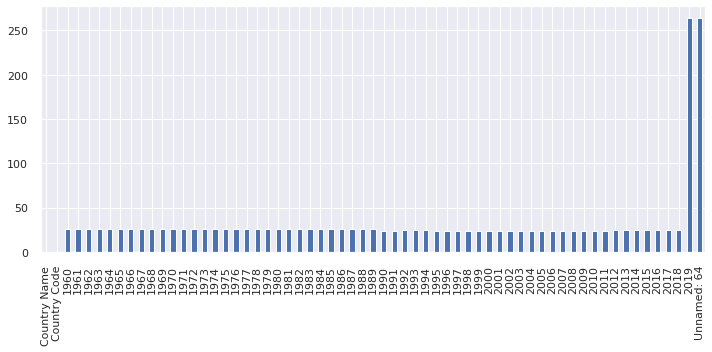

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (10,5))
df_male.isna().sum().plot(kind= 'bar')
plt.tight_layout()

In [8]:
last_values(df_male)

,Country Name,Country Code,last_value
0,Arab World,ARB,2.174921e+08
1,Caribbean small states,CSS,3.589576e+06
2,Central Europe and the Baltics,CEB,4.961555e+07
3,Early-demographic dividend,EAR,1.654720e+09
4,East Asia & Pacific,EAS,1.180036e+09
...,...,...,...
259,Virgin Islands (U.S.),VIR,5.088100e+04
260,West Bank and Gaza,PSE,2.317549e+06
261,"Yemen, Rep.",YEM,1.436002e+07
262,Zambia,ZMB,8.590330e+06


In [9]:
last_values(df_male).isna().sum()

Country Name     0
Country Code     0
last_value      24
dtype: int64

In [10]:
df_female = extract_indicator(df, 'Population, female')
df_female

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,45716042.0,46969153.0,48265242.0,49607120.0,50998483.0,52441568.0,53942656.0,55501218.0,...,1.753858e+08,1.793290e+08,1.833021e+08,1.872465e+08,1.911238e+08,1.949031e+08,1.985981e+08,2.022985e+08,NaN,NaN
1,Caribbean small states,CSS,2094375.0,2135833.0,2177159.0,2217459.0,2255516.0,2290457.0,2321937.0,2350279.0,...,3.478497e+06,3.503216e+06,3.528142e+06,3.552849e+06,3.576971e+06,3.600425e+06,3.623218e+06,3.645323e+06,NaN,NaN
2,Central Europe and the Baltics,CEB,47159241.0,47553903.0,47921811.0,48318981.0,48742410.0,49092113.0,49435478.0,49880749.0,...,5.386151e+07,5.371806e+07,5.358125e+07,5.344775e+07,5.330737e+07,5.315882e+07,5.301856e+07,5.289637e+07,NaN,NaN
3,Early-demographic dividend,EAR,480200421.0,491514434.0,503232895.0,515327960.0,527816938.0,540691075.0,553945999.0,567615385.0,...,1.447137e+09,1.468484e+09,1.489766e+09,1.510963e+09,1.532047e+09,1.552972e+09,1.573731e+09,1.594420e+09,NaN,NaN
4,East Asia & Pacific,EAS,511374181.0,513443372.0,520739993.0,533516542.0,546125249.0,559259529.0,574070466.0,588286447.0,...,1.093951e+09,1.101538e+09,1.109232e+09,1.117063e+09,1.124874e+09,1.132824e+09,1.140799e+09,1.147972e+09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Virgin Islands (U.S.),VIR,16388.0,17266.0,17584.0,19953.0,20424.0,21744.0,23066.0,24492.0,...,5.653800e+04,5.653600e+04,5.649300e+04,5.643500e+04,5.638300e+04,5.630600e+04,5.621700e+04,5.609600e+04,NaN,NaN
260,West Bank and Gaza,PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.912960e+06,1.960670e+06,2.008167e+06,2.055699e+06,2.103363e+06,2.151335e+06,2.194861e+06,2.251538e+06,NaN,NaN
261,"Yemen, Rep.",YEM,2658373.0,2699309.0,2741623.0,2785469.0,2831029.0,2878475.0,2928316.0,2980793.0,...,1.180666e+07,1.213653e+07,1.247075e+07,1.280651e+07,1.314169e+07,1.347530e+07,1.380752e+07,1.413867e+07,NaN,NaN
262,Zambia,ZMB,1543004.0,1590344.0,1639223.0,1689739.0,1742052.0,1796325.0,1852581.0,1910944.0,...,7.096726e+06,7.317282e+06,7.546979e+06,7.782711e+06,8.022194e+06,8.264715e+06,8.510888e+06,8.761492e+06,NaN,NaN


In [11]:
df_female.isna().sum()

Country Name      0
Country Code      0
1960             26
1961             26
1962             26
               ... 
2016             25
2017             25
2018             25
2019            264
Unnamed: 64     264
Length: 63, dtype: int64

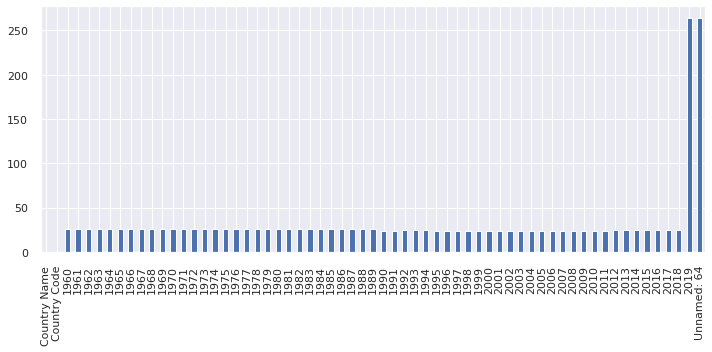

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (10,5))
df_female.isna().sum().plot(kind= 'bar')
plt.tight_layout()

In [13]:
last_values(df_female).isna().sum()

Country Name     0
Country Code     0
last_value      24
dtype: int64

Ganamos un país con la f last_values

In [14]:
df_male

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,46481711.0,47755357.0,49069200.0,50427059.0,51834277.0,53294863.0,54815954.0,56398146.0,...,1.877729e+08,1.921145e+08,1.964036e+08,2.006613e+08,2.049045e+08,2.091214e+08,2.133009e+08,2.174921e+08,NaN,NaN
1,Caribbean small states,CSS,1989129.0,2026003.0,2063524.0,2101315.0,2138825.0,2175665.0,2211761.0,2247180.0,...,3.423527e+06,3.448597e+06,3.473843e+06,3.498727e+06,3.522855e+06,3.546029e+06,3.568269e+06,3.589576e+06,NaN,NaN
2,Central Europe and the Baltics,CEB,44242523.0,44678835.0,45087687.0,45521035.0,45973385.0,46348875.0,46710858.0,47162521.0,...,5.031252e+07,5.021726e+07,5.013248e+07,5.004843e+07,4.995038e+07,4.983553e+07,4.972029e+07,4.961555e+07,NaN,NaN
3,Early-demographic dividend,EAR,499884835.0,511764752.0,524057471.0,536732006.0,549804100.0,563263634.0,577104086.0,591358958.0,...,1.504720e+09,1.526369e+09,1.547897e+09,1.569362e+09,1.590795e+09,1.612170e+09,1.633457e+09,1.654720e+09,NaN,NaN
4,East Asia & Pacific,EAS,529519689.0,531035336.0,538210979.0,551209885.0,564017034.0,577357703.0,592453217.0,606905059.0,...,1.127517e+09,1.135075e+09,1.142608e+09,1.150210e+09,1.157772e+09,1.165478e+09,1.173190e+09,1.180036e+09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Virgin Islands (U.S.),VIR,16112.0,17034.0,17416.0,19847.0,20376.0,21756.0,23134.0,24608.0,...,5.175400e+04,5.165500e+04,5.155100e+04,5.144900e+04,5.132700e+04,5.120400e+04,5.105100e+04,5.088100e+04,NaN,NaN
260,West Bank and Gaza,PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.970026e+06,2.019328e+06,2.068541e+06,2.117699e+06,2.166729e+06,2.215753e+06,2.259944e+06,2.317549e+06,NaN,NaN
261,"Yemen, Rep.",YEM,2656982.0,2693727.0,2732048.0,2771297.0,2810568.0,2849276.0,2887931.0,2927081.0,...,1.200093e+07,1.233665e+07,1.267636e+07,1.301698e+07,1.335620e+07,1.369291e+07,1.402730e+07,1.436002e+07,NaN,NaN
262,Zambia,ZMB,1527772.0,1573985.0,1621427.0,1670365.0,1721161.0,1774139.0,1829374.0,1886929.0,...,6.926467e+06,7.147839e+06,7.379525e+06,7.617042e+06,7.857167e+06,8.098792e+06,8.342800e+06,8.590330e+06,NaN,NaN


In [15]:
df_population = pd.concat([last_values(df_male), last_values(df_female).loc[:,'last_value'].rename('last')],
                          axis = 1)
df_population

,Country Name,Country Code,last_value,last
0,Arab World,ARB,2.174921e+08,2.022985e+08
1,Caribbean small states,CSS,3.589576e+06,3.645323e+06
2,Central Europe and the Baltics,CEB,4.961555e+07,5.289637e+07
3,Early-demographic dividend,EAR,1.654720e+09,1.594420e+09
4,East Asia & Pacific,EAS,1.180036e+09,1.147972e+09
...,...,...,...,...
259,Virgin Islands (U.S.),VIR,5.088100e+04,5.609600e+04
260,West Bank and Gaza,PSE,2.317549e+06,2.251538e+06
261,"Yemen, Rep.",YEM,1.436002e+07,1.413867e+07
262,Zambia,ZMB,8.590330e+06,8.761492e+06


Uno la población de mujeres con la de hombres para tener la población total:

In [16]:
df_population['population'] = df_population['last_value'] + df_population['last']
df_population = df_population[['Country Name', 'Country Code', 'population']]
df_population

,Country Name,Country Code,population
0,Arab World,ARB,4.197906e+08
1,Caribbean small states,CSS,7.234899e+06
2,Central Europe and the Baltics,CEB,1.025119e+08
3,Early-demographic dividend,EAR,3.249141e+09
4,East Asia & Pacific,EAS,2.328008e+09
...,...,...,...
259,Virgin Islands (U.S.),VIR,1.069770e+05
260,West Bank and Gaza,PSE,4.569087e+06
261,"Yemen, Rep.",YEM,2.849869e+07
262,Zambia,ZMB,1.735182e+07


Para ver la población total de un país:

In [17]:
df_population.loc[df_population['Country Code'] == 'ESP']

,Country Name,Country Code,population
226,Spain,ESP,46723749.0


In [18]:
df_population.isna().sum()

Country Name     0
Country Code     0
population      24
dtype: int64

No tengo los datos de población de 24 paises.

## ARRIVALS

In [19]:
df_arrivals = extract_indicator(df, 'International tourism, number of arrivals')
df_arrivals

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.666001e+07,8.484459e+07,8.511414e+07,9.087667e+07,8.816923e+07,8.772175e+07,9.418118e+07,1.014637e+08,NaN,NaN
1,Caribbean small states,CSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.849000e+06,6.029000e+06,6.007400e+06,6.240500e+06,6.451000e+06,6.642000e+06,6.870000e+06,7.351484e+06,NaN,NaN
2,Central Europe and the Baltics,CEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.396800e+07,6.788400e+07,7.097200e+07,7.482800e+07,8.066300e+07,8.697500e+07,9.347400e+07,1.001090e+08,NaN,NaN
3,Early-demographic dividend,EAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.775044e+08,1.902860e+08,1.984108e+08,2.225247e+08,2.274790e+08,2.213643e+08,2.464429e+08,2.755874e+08,NaN,NaN
4,East Asia & Pacific,EAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.068325e+08,2.214895e+08,2.361561e+08,2.490706e+08,2.634175e+08,2.837685e+08,3.005223e+08,3.202684e+08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Virgin Islands (U.S.),VIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.670000e+05,6.190000e+05,5.900000e+05,6.150000e+05,6.420000e+05,6.670000e+05,5.350000e+05,3.810000e+05,NaN,NaN
260,West Bank and Gaza,PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.490000e+05,4.900000e+05,5.450000e+05,5.560000e+05,4.320000e+05,4.000000e+05,5.030000e+05,6.060000e+05,NaN,NaN
261,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.290000e+05,8.740000e+05,9.900000e+05,1.017500e+06,3.667000e+05,NaN,NaN,NaN,NaN,NaN
262,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.200000e+05,8.590000e+05,9.150000e+05,9.470000e+05,9.320000e+05,9.560000e+05,1.083000e+06,1.072000e+06,NaN,NaN


In [20]:
df_arrivals.loc[df_arrivals['Country Name'] == 'Andorra']

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
51,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2242000.0,2238000.0,2328000.0,2363000.0,2663000.0,2819000.0,3003000.0,3042000.0,NaN,NaN


In [21]:
df_arrivals.isna().sum()

Country Name      0
Country Code      0
1960            264
1961            264
1962            264
               ... 
2016             28
2017             37
2018             54
2019            264
Unnamed: 64     264
Length: 63, dtype: int64

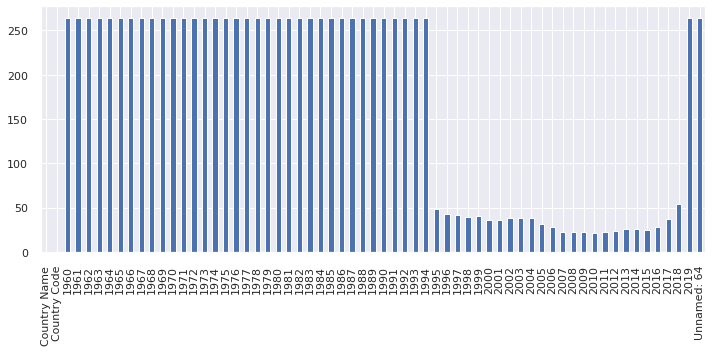

In [22]:
fig, ax = plt.subplots(1, 1, figsize = (10,5))
df_arrivals.isna().sum().plot(kind = 'bar')
plt.tight_layout()

In [23]:
df_arrivals = last_values(df_arrivals)
df_arrivals.isna().sum()

Country Name     0
Country Code     0
last_value      15
dtype: int64

He conseguido recuperar 39 paises.

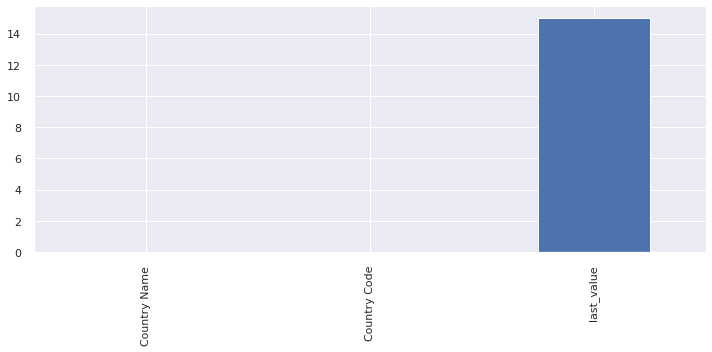

In [24]:
fig, ax = plt.subplots(1, 1, figsize = (10,5))
df_arrivals.isna().sum().plot(kind = 'bar')
plt.tight_layout()

In [25]:
df_arrivals

,Country Name,Country Code,last_value
0,Arab World,ARB,1.014637e+08
1,Caribbean small states,CSS,7.351484e+06
2,Central Europe and the Baltics,CEB,1.001090e+08
3,Early-demographic dividend,EAR,2.755874e+08
4,East Asia & Pacific,EAS,3.202684e+08
...,...,...,...
259,Virgin Islands (U.S.),VIR,3.810000e+05
260,West Bank and Gaza,PSE,6.060000e+05
261,"Yemen, Rep.",YEM,3.667000e+05
262,Zambia,ZMB,1.072000e+06


## DEPARTURES

In [26]:
df_departures = extract_indicator(df, 'International tourism, number of departures')
df_departures

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Caribbean small states,CSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Central Europe and the Baltics,CEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.465000e+07,4.660300e+07,4.788100e+07,5.038300e+07,5.346200e+07,5.804300e+07,6.587700e+07,7.171708e+07,NaN,NaN
3,Early-demographic dividend,EAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.303752e+08,1.409301e+08,1.524263e+08,1.628875e+08,1.764961e+08,1.907659e+08,2.005854e+08,2.019267e+08,NaN,NaN
4,East Asia & Pacific,EAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.633744e+08,2.854845e+08,3.067246e+08,3.317577e+08,3.573817e+08,3.785244e+08,3.974452e+08,4.150304e+08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Virgin Islands (U.S.),VIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,West Bank and Gaza,PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_departures.isna().sum()

Country Name      0
Country Code      0
1960            264
1961            264
1962            264
               ... 
2016            139
2017            141
2018            145
2019            264
Unnamed: 64     264
Length: 63, dtype: int64

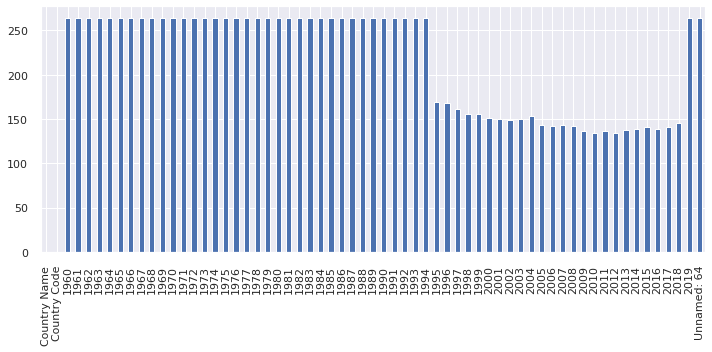

In [28]:
fig, ax = plt.subplots(1, 1, figsize = (10,5))
df_departures.isna().sum().plot(kind = 'bar')
plt.tight_layout()

In [29]:
df_departures = last_values(df_departures)
df_departures.isna().sum()

Country Name      0
Country Code      0
last_value      108
dtype: int64

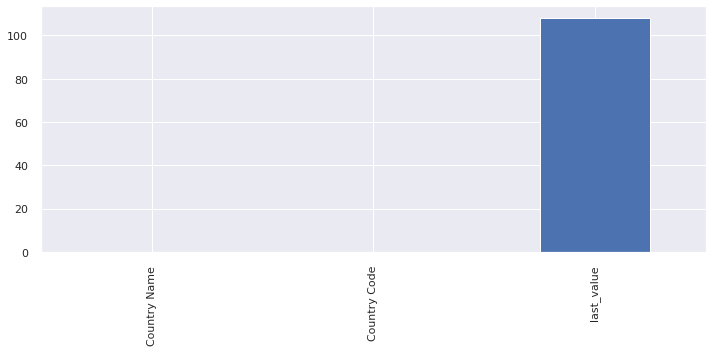

In [30]:
fig, ax = plt.subplots(1, 1, figsize = (10,5))
df_departures.isna().sum().plot(kind = 'bar')
plt.tight_layout()

He recuperado 37 paises.

In [31]:
df_departures

,Country Name,Country Code,last_value
0,Arab World,ARB,NaN
1,Caribbean small states,CSS,NaN
2,Central Europe and the Baltics,CEB,7.171708e+07
3,Early-demographic dividend,EAR,2.019267e+08
4,East Asia & Pacific,EAS,4.150304e+08
...,...,...,...
259,Virgin Islands (U.S.),VIR,NaN
260,West Bank and Gaza,PSE,NaN
261,"Yemen, Rep.",YEM,NaN
262,Zambia,ZMB,NaN


## FULL DATAFRAME

In [32]:
df_full = pd.merge(df_population, df_arrivals)
df_full.rename(columns = {'last_value': 'arrivals'}, inplace = True)
df_full

,Country Name,Country Code,population,arrivals
0,Arab World,ARB,4.197906e+08,1.014637e+08
1,Caribbean small states,CSS,7.234899e+06,7.351484e+06
2,Central Europe and the Baltics,CEB,1.025119e+08,1.001090e+08
3,Early-demographic dividend,EAR,3.249141e+09,2.755874e+08
4,East Asia & Pacific,EAS,2.328008e+09,3.202684e+08
...,...,...,...,...
259,Virgin Islands (U.S.),VIR,1.069770e+05,3.810000e+05
260,West Bank and Gaza,PSE,4.569087e+06,6.060000e+05
261,"Yemen, Rep.",YEM,2.849869e+07,3.667000e+05
262,Zambia,ZMB,1.735182e+07,1.072000e+06


In [33]:
df_full = pd.merge(df_full, df_departures)
df_full.rename(columns = {'last_value': 'departures'}, inplace = True)
df_full

,Country Name,Country Code,population,arrivals,departures
0,Arab World,ARB,4.197906e+08,1.014637e+08,NaN
1,Caribbean small states,CSS,7.234899e+06,7.351484e+06,NaN
2,Central Europe and the Baltics,CEB,1.025119e+08,1.001090e+08,7.171708e+07
3,Early-demographic dividend,EAR,3.249141e+09,2.755874e+08,2.019267e+08
4,East Asia & Pacific,EAS,2.328008e+09,3.202684e+08,4.150304e+08
...,...,...,...,...,...
259,Virgin Islands (U.S.),VIR,1.069770e+05,3.810000e+05,NaN
260,West Bank and Gaza,PSE,4.569087e+06,6.060000e+05,NaN
261,"Yemen, Rep.",YEM,2.849869e+07,3.667000e+05,NaN
262,Zambia,ZMB,1.735182e+07,1.072000e+06,NaN


In [34]:
df_full.isna().sum()

Country Name      0
Country Code      0
population       24
arrivals         15
departures      108
dtype: int64

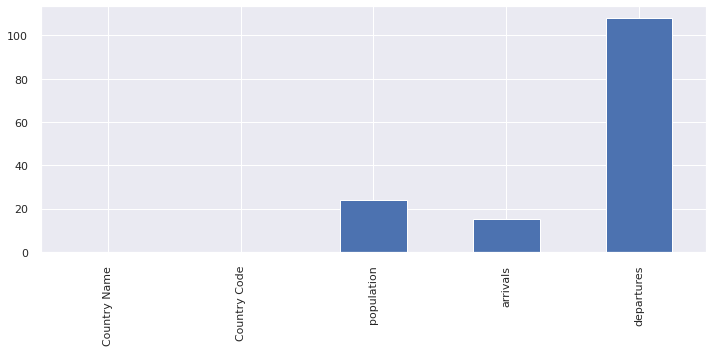

In [35]:
fig, ax = plt.subplots(1, 1, figsize = (10,5))
df_full.isna().sum().plot(kind = 'bar')
plt.tight_layout()

In [36]:
df_full.loc[df_full['Country Code'] == 'ZWE']

,Country Name,Country Code,population,arrivals,departures
263,Zimbabwe,ZWE,14439018.0,2580000.0,2987000.0


### COORDINATES

In [37]:
# df_coord = pd.read_csv('/Users/agm/Documents/KSchool/TFM/datasets/country_centroids_az8.csv')
# df_coord

In [38]:
# df_coord.columns

In [39]:
# df_coord = df_coord[['iso_a2','iso_a3', 'Longitude', 'Latitude']]
# df_coord

Utilizo este csv no el anterior.

In [40]:
df_coord2 = pd.read_csv("../data/raw/tableconvert_iso.csv")
df_coord2

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,AF,AFG,4,33.0000,65.0
1,Albania,AL,ALB,8,41.0000,20.0
2,Algeria,DZ,DZA,12,28.0000,3.0
3,American Samoa,AS,ASM,16,-14.3333,-170.0
4,Andorra,AD,AND,20,42.5000,1.6
...,...,...,...,...,...,...
251,Wallis and Futuna,WF,WLF,876,-13.3000,-176.2
252,Western Sahara,EH,ESH,732,24.5000,-13.0
253,Yemen,YE,YEM,887,15.0000,48.0
254,Zambia,ZM,ZMB,894,-15.0000,30.0


In [41]:
df_coord2.rename(columns = {'Alpha-3 code': 'Country Code', 'Latitude (average)': 'latitude',
                           'Longitude (average)': 'longitude'}, inplace = True)

En el segundo df tengo mas paises, y por ejemplo francia en el primero esta mal representada...

In [42]:
df_full

,Country Name,Country Code,population,arrivals,departures
0,Arab World,ARB,4.197906e+08,1.014637e+08,NaN
1,Caribbean small states,CSS,7.234899e+06,7.351484e+06,NaN
2,Central Europe and the Baltics,CEB,1.025119e+08,1.001090e+08,7.171708e+07
3,Early-demographic dividend,EAR,3.249141e+09,2.755874e+08,2.019267e+08
4,East Asia & Pacific,EAS,2.328008e+09,3.202684e+08,4.150304e+08
...,...,...,...,...,...
259,Virgin Islands (U.S.),VIR,1.069770e+05,3.810000e+05,NaN
260,West Bank and Gaza,PSE,4.569087e+06,6.060000e+05,NaN
261,"Yemen, Rep.",YEM,2.849869e+07,3.667000e+05,NaN
262,Zambia,ZMB,1.735182e+07,1.072000e+06,NaN


Veo que no hay duplicados:

In [43]:
df_full['Country Code'].nunique()

264

In [44]:
df_coord2

,Country,Alpha-2 code,Country Code,Numeric code,latitude,longitude
0,Afghanistan,AF,AFG,4,33.0000,65.0
1,Albania,AL,ALB,8,41.0000,20.0
2,Algeria,DZ,DZA,12,28.0000,3.0
3,American Samoa,AS,ASM,16,-14.3333,-170.0
4,Andorra,AD,AND,20,42.5000,1.6
...,...,...,...,...,...,...
251,Wallis and Futuna,WF,WLF,876,-13.3000,-176.2
252,Western Sahara,EH,ESH,732,24.5000,-13.0
253,Yemen,YE,YEM,887,15.0000,48.0
254,Zambia,ZM,ZMB,894,-15.0000,30.0


In [45]:
df_coord2['Country Code'].nunique()

243

Veo los valores que hay duplicados en el df de coordenadas.

In [46]:
repeated_codes = list(df_coord2['Country Code'].value_counts()[df_coord2['Country Code'].value_counts() > 1].index)

In [47]:
df_coord2.loc[df_coord2['Country Code'].isin(repeated_codes)]

,Country,Alpha-2 code,Country Code,Numeric code,latitude,longitude
25,"Bolivia, Plurinational State of",BO,BOL,68,-17.00,-65.0000
26,Bolivia,BO,BOL,68,-17.00,-65.0000
32,Brunei Darussalam,BN,BRN,96,4.50,114.6667
33,Brunei,BN,BRN,96,4.50,114.6667
54,Côte d'Ivoire,CI,CIV,384,8.00,-5.0000
55,Ivory Coast,CI,CIV,384,8.00,-5.0000
118,"Korea, Republic of",KR,KOR,410,37.00,127.5000
119,South Korea,KR,KOR,410,37.00,127.5000
127,Libyan Arab Jamahiriya,LY,LBY,434,25.00,17.0000
128,Libya,LY,LBY,434,25.00,17.0000


Si quisiera seleccionar con que nombres quedarme de los repetidos.

In [48]:
#rows_to_drop = ['Bolivia, Plurinational State of', 'Brunei Darussalam', "Côte d'Ivoire", 'Korea, Republic of',
#               'Libyan Arab Jamahiriya', 'Burma', '']

En el merge tengo que hace drop_duplicates porque en df_coord2 tengo keys (Country codes) duplicados.

In [49]:
df_full = pd.merge(df_full, df_coord2.loc[:, ['Country Code', 'latitude', 'longitude']].drop_duplicates(),
         on = 'Country Code', how = 'left')
df_full.rename(columns = {'Country Name': 'country_name', 'Country Code': 'country_code'}, inplace = True)
df_full

,country_name,country_code,population,arrivals,departures,latitude,longitude
0,Arab World,ARB,4.197906e+08,1.014637e+08,NaN,NaN,NaN
1,Caribbean small states,CSS,7.234899e+06,7.351484e+06,NaN,NaN,NaN
2,Central Europe and the Baltics,CEB,1.025119e+08,1.001090e+08,7.171708e+07,NaN,NaN
3,Early-demographic dividend,EAR,3.249141e+09,2.755874e+08,2.019267e+08,NaN,NaN
4,East Asia & Pacific,EAS,2.328008e+09,3.202684e+08,4.150304e+08,NaN,NaN
...,...,...,...,...,...,...,...
259,Virgin Islands (U.S.),VIR,1.069770e+05,3.810000e+05,NaN,18.3333,-64.8333
260,West Bank and Gaza,PSE,4.569087e+06,6.060000e+05,NaN,32.0000,35.2500
261,"Yemen, Rep.",YEM,2.849869e+07,3.667000e+05,NaN,15.0000,48.0000
262,Zambia,ZMB,1.735182e+07,1.072000e+06,NaN,-15.0000,30.0000


In [50]:
df_full.isna().sum()

country_name      0
country_code      0
population       24
arrivals         15
departures      108
latitude         53
longitude        53
dtype: int64

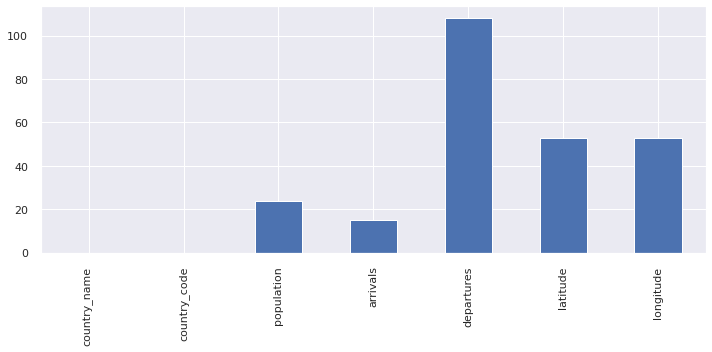

In [51]:
fig, ax = plt.subplots(1, 1, figsize = (10,5))
df_full.isna().sum().plot(kind = 'bar')
plt.tight_layout()

In [52]:
df_full.sort_values(by = 'population', ascending = False)

,country_name,country_code,population,arrivals,departures,latitude,longitude
46,World,WLD,7.591405e+09,1.441953e+09,1.563556e+09,NaN,NaN
16,IDA & IBRD total,IBT,6.410452e+09,6.103049e+08,6.255181e+08,NaN,NaN
25,Low & middle income,LMY,6.381903e+09,5.690384e+08,6.027033e+08,NaN,NaN
31,Middle income,MIC,5.676486e+09,5.378847e+08,5.381497e+08,NaN,NaN
15,IBRD only,IBD,4.772201e+09,5.317410e+08,4.782542e+08,NaN,NaN
...,...,...,...,...,...,...,...
219,Sint Maarten (Dutch part),SXM,NaN,1.780000e+05,NaN,NaN,NaN
228,St. Kitts and Nevis,KNA,NaN,1.250000e+05,NaN,17.3333,-62.7500
230,St. Martin (French part),MAF,NaN,NaN,NaN,NaN,NaN
247,Turks and Caicos Islands,TCA,NaN,4.410000e+05,NaN,21.7500,-71.5833


Voy a quitar las filas que no tengan localización, porq posiblemente no sean paises, o simplemente no tengo su localizacion:

In [53]:
df_full.dropna(subset = ['latitude'], inplace = True)

In [54]:
df_full

,country_name,country_code,population,arrivals,departures,latitude,longitude
47,Afghanistan,AFG,37172386.0,NaN,NaN,33.0000,65.0000
48,Albania,ALB,2866376.0,5340000.0,5415000.0,41.0000,20.0000
49,Algeria,DZA,42228429.0,2657000.0,5610000.0,28.0000,3.0000
50,American Samoa,ASM,NaN,20200.0,NaN,-14.3333,-170.0000
51,Andorra,AND,NaN,3042000.0,NaN,42.5000,1.6000
...,...,...,...,...,...,...,...
259,Virgin Islands (U.S.),VIR,106977.0,381000.0,NaN,18.3333,-64.8333
260,West Bank and Gaza,PSE,4569087.0,606000.0,NaN,32.0000,35.2500
261,"Yemen, Rep.",YEM,28498687.0,366700.0,NaN,15.0000,48.0000
262,Zambia,ZMB,17351822.0,1072000.0,NaN,-15.0000,30.0000


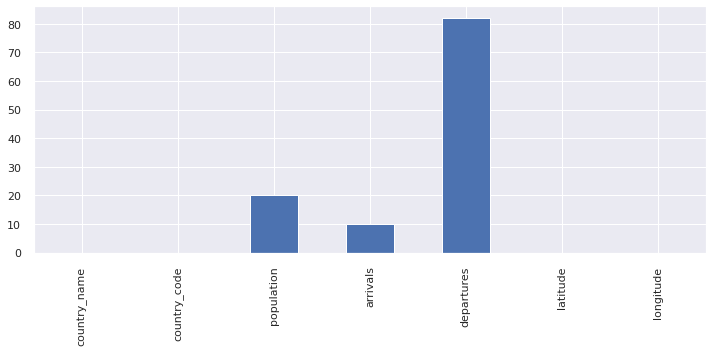

In [55]:
fig, ax = plt.subplots(1, 1, figsize = (10,5))
df_full.isna().sum().plot(kind = 'bar')
plt.tight_layout()

### OTHER INFORMATION

In [56]:
df_full['arrivals/total'] = df_full['arrivals'] / np.sum(df_full['arrivals'])
df_full['departures/total'] = df_full['departures'] / np.sum(df_full['departures'])
df_full['arrivals/population'] = df_full['arrivals'] / df_full['population']
df_full['departures/population'] = df_full['departures'] / df_full['population']
df_full

,country_name,country_code,population,arrivals,departures,latitude,longitude,arrivals/total,departures/total,arrivals/population,departures/population
47,Afghanistan,AFG,37172386.0,NaN,NaN,33.0000,65.0000,NaN,NaN,NaN,NaN
48,Albania,ALB,2866376.0,5340000.0,5415000.0,41.0000,20.0000,0.003759,0.004280,1.862980,1.889145
49,Algeria,DZA,42228429.0,2657000.0,5610000.0,28.0000,3.0000,0.001870,0.004434,0.062920,0.132849
50,American Samoa,ASM,NaN,20200.0,NaN,-14.3333,-170.0000,0.000014,NaN,NaN,NaN
51,Andorra,AND,NaN,3042000.0,NaN,42.5000,1.6000,0.002141,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
259,Virgin Islands (U.S.),VIR,106977.0,381000.0,NaN,18.3333,-64.8333,0.000268,NaN,3.561513,NaN
260,West Bank and Gaza,PSE,4569087.0,606000.0,NaN,32.0000,35.2500,0.000427,NaN,0.132630,NaN
261,"Yemen, Rep.",YEM,28498687.0,366700.0,NaN,15.0000,48.0000,0.000258,NaN,0.012867,NaN
262,Zambia,ZMB,17351822.0,1072000.0,NaN,-15.0000,30.0000,0.000755,NaN,0.061780,NaN


In [57]:
print(f"Tengo información de {df_full.shape[0]} paises.")

Tengo información de 211 paises.


In [58]:
G = nx.read_gpickle("../data/interim/routes_countries.gpickle")

In [59]:
print(len(list(G.nodes)))
G.nodes

223


NodeView(('AZ', 'RU', 'CI', 'BF', 'GH', 'ML', 'SN', 'BJ', 'TG', 'NE', 'CO', 'EC', 'IT', 'CH', 'FR', 'GB', 'ES', 'CY', 'EG', 'SE', 'FI', 'NO', 'AE', 'PH', 'NG', 'LR', 'GM', 'SL', 'GN', 'GW', 'CM', 'DJ', 'SA', 'SO', 'KE', 'TH', 'SG', 'AU', 'CN', 'HK', 'JP', 'TW', 'MY', 'KH', 'MM', 'VN', 'DE', 'HR', 'AT', 'BS', 'US', 'NL', 'MA', 'BE', 'TR', 'AW', 'VE', 'UZ', 'ME', 'AG', 'GP', 'GF', 'MQ', 'DO', 'DM', 'LC', 'MP', 'KR', 'CA', 'IL', 'BD', 'IN', 'OM', 'NP', 'AR', 'MX', 'GT', 'CU', 'CR', 'AF', 'PK', 'MK', 'DZ', 'GR', 'RS', 'HU', 'IE', 'PT', 'CZ', 'BA', 'TN', 'PL', 'PA', 'NI', 'TZ', 'BN', 'ID', 'MO', 'KN', 'UY', 'PY', 'BR', 'CL', 'BZ', 'HN', 'GE', 'AM', 'LV', 'GU', 'JM', 'SR', 'TT', 'HT', 'TJ', 'KZ', 'KG', 'IR', 'UA', 'JO', 'LY', 'TD', 'AI', 'PR', 'VG', 'VI', 'MD', 'RO', 'KW', 'BH', 'LK', 'QA', 'ZA', 'BG', 'AL', 'DK', 'NZ', 'PF', 'BM', 'BB', 'KY', 'TC', 'PE', 'SV', 'UG', 'GI', 'GD', 'FJ', 'LU', 'BO', 'GG', 'JE', 'MT', 'ET', 'BI', 'RW', 'AO', 'LT', 'CD', 'ZW', 'LB', 'CF', 'LA', 'CG', 'GA', 'SI', 

Creo un diccionario con los paises a los que se puede ir desde cada pais. Elimino el propio pais de la lista de destinos:

In [60]:
country_to_destination = {}

for country in G:
    destinations = list(G[country])
    if country in destinations: destinations.remove(country)
    country_to_destination[country] = destinations

In [61]:
country_to_destination

{'AZ': ['RU',
  'FR',
  'IT',
  'BY',
  'GB',
  'LV',
  'CN',
  'KZ',
  'AF',
  'AE',
  'UZ',
  'IR',
  'QA',
  'TR',
  'DE',
  'UA',
  'CZ',
  'GE',
  'IL',
  'AT',
  'TM',
  'HU'],
 'RU': ['AZ',
  'UZ',
  'ME',
  'NO',
  'AM',
  'CZ',
  'TJ',
  'KZ',
  'TR',
  'MD',
  'GR',
  'GE',
  'DE',
  'FR',
  'DZ',
  'IT',
  'MA',
  'FI',
  'KG',
  'BY',
  'GB',
  'TN',
  'LV',
  'CN',
  'TH',
  'CU',
  'HK',
  'CY',
  'US',
  'AE',
  'BG',
  'AT',
  'JP',
  'ES',
  'IR',
  'SI',
  'KP',
  'RS',
  'KR',
  'NL',
  'MT',
  'PL',
  'CH',
  'IL',
  'UA',
  'LB',
  'EG',
  'MN',
  'EE',
  'QA',
  'JO',
  'RO',
  'TM',
  'PT',
  'HR',
  'SE',
  'DK',
  'BE',
  'SG',
  'HU',
  'IN',
  'VN',
  'MV',
  'DO',
  'LT',
  'CA',
  'LK',
  'MX',
  'MU',
  'SC'],
 'CI': ['BF',
  'BE',
  'FR',
  'DZ',
  'MA',
  'BJ',
  'SN',
  'GH',
  'SL',
  'LR',
  'GN',
  'TG',
  'NG',
  'ML',
  'CM',
  'GA',
  'KE',
  'TR',
  'TN'],
 'BF': ['CI',
  'GH',
  'ML',
  'BJ',
  'SN',
  'TG',
  'NE',
  'BE',
  'FR',
  'DZ',
  'MA

In [62]:
print(f"From Spain I can go to {len(country_to_destination['ES'])} countries.")

From Spain I can go to 73 countries.


In [63]:
print(f"I can go to {len(country_to_destination['US'])} countries.")

I can go to 92 countries.


In [64]:
with open('../data/interim/alpha2_to_alpha3.txt', 'r') as file:
    alpha2_to_alpha3 = json.load(file)

Modifico el diccionario de posibles destinos de un pais para tenerlo en iso 3:

In [65]:
country_to_destination = {alpha2_to_alpha3[k]: [alpha2_to_alpha3[x] for x in v] for k, v in country_to_destination.items()}

In [66]:
type(country_to_destination['AZE'])

list

In [67]:
country_to_destination

{'AZE': ['RUS',
  'FRA',
  'ITA',
  'BLR',
  'GBR',
  'LVA',
  'CHN',
  'KAZ',
  'AFG',
  'ARE',
  'UZB',
  'IRN',
  'QAT',
  'TUR',
  'DEU',
  'UKR',
  'CZE',
  'GEO',
  'ISR',
  'AUT',
  'TKM',
  'HUN'],
 'RUS': ['AZE',
  'UZB',
  'MNE',
  'NOR',
  'ARM',
  'CZE',
  'TJK',
  'KAZ',
  'TUR',
  'MDA',
  'GRC',
  'GEO',
  'DEU',
  'FRA',
  'DZA',
  'ITA',
  'MAR',
  'FIN',
  'KGZ',
  'BLR',
  'GBR',
  'TUN',
  'LVA',
  'CHN',
  'THA',
  'CUB',
  'HKG',
  'CYP',
  'USA',
  'ARE',
  'BGR',
  'AUT',
  'JPN',
  'ESP',
  'IRN',
  'SVN',
  'PRK',
  'SRB',
  'KOR',
  'NLD',
  'MLT',
  'POL',
  'CHE',
  'ISR',
  'UKR',
  'LBN',
  'EGY',
  'MNG',
  'EST',
  'QAT',
  'JOR',
  'ROU',
  'TKM',
  'PRT',
  'HRV',
  'SWE',
  'DNK',
  'BEL',
  'SGP',
  'HUN',
  'IND',
  'VNM',
  'MDV',
  'DOM',
  'LTU',
  'CAN',
  'LKA',
  'MEX',
  'MUS',
  'SYC'],
 'CIV': ['BFA',
  'BEL',
  'FRA',
  'DZA',
  'MAR',
  'BEN',
  'SEN',
  'GHA',
  'SLE',
  'LBR',
  'GIN',
  'TGO',
  'NGA',
  'MLI',
  'CMR',
  'GAB',
  'KE

Hago el dataframe con toda la información de cada país, y sus posibles destinos

In [68]:
df_full['destinations'] = df_full['country_code'].map(country_to_destination)
df_full

,country_name,country_code,population,arrivals,departures,latitude,longitude,arrivals/total,departures/total,arrivals/population,departures/population,destinations
47,Afghanistan,AFG,37172386.0,NaN,NaN,33.0000,65.0000,NaN,NaN,NaN,NaN,"[IND, PAK, ARE, IRN, TUR, AZE, KWT, TJK]"
48,Albania,ALB,2866376.0,5340000.0,5415000.0,41.0000,20.0000,0.003759,0.004280,1.862980,1.889145,"[GRC, ITA, GBR, DEU, SVN, AUT, TUR]"
49,Algeria,DZA,42228429.0,2657000.0,5610000.0,28.0000,3.0000,0.001870,0.004434,0.062920,0.132849,"[DEU, FRA, TUR, CIV, ESP, JOR, LBN, MLI, BEL, ..."
50,American Samoa,ASM,NaN,20200.0,NaN,-14.3333,-170.0000,0.000014,NaN,NaN,NaN,[USA]
51,Andorra,AND,NaN,3042000.0,NaN,42.5000,1.6000,0.002141,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
259,Virgin Islands (U.S.),VIR,106977.0,381000.0,NaN,18.3333,-64.8333,0.000268,NaN,3.561513,NaN,"[VGB, PRI, USA, AIA, DMA, KNA]"
260,West Bank and Gaza,PSE,4569087.0,606000.0,NaN,32.0000,35.2500,0.000427,NaN,0.132630,NaN,NaN
261,"Yemen, Rep.",YEM,28498687.0,366700.0,NaN,15.0000,48.0000,0.000258,NaN,0.012867,NaN,"[ARE, SAU, SOM, DJI, BHR, JOR, IND, EGY, QAT, ..."
262,Zambia,ZMB,17351822.0,1072000.0,NaN,-15.0000,30.0000,0.000755,NaN,0.061780,NaN,"[NLD, ZWE, MWI, KEN, ZAF, BWA, AGO, ARE, ETH, ..."


Compruebo que se han asignado bien los desitnos en el dataframe

In [69]:
len(df_full.loc[df_full['country_code'] == 'ESP', 'destinations'].item()) == len(country_to_destination['ESP'])

True

Añado el continente al que pertenece cada pais:

In [70]:
df_continents = pd.read_csv('../data/raw/country_to_continent.csv')
df_continents.rename(columns = {'Three_Letter_Country_Code': 'country_code', 'Continent_Name': 'continent_name',
                               'Continent_Code': 'continent_code'},
                     inplace = True)
df_continents = df_continents.loc[:, ['continent_name', 'continent_code', 'country_code']]
df_continents

,continent_name,continent_code,country_code
0,Asia,AS,AFG
1,Europe,EU,ALB
2,Antarctica,AN,ATA
3,Africa,AF,DZA
4,Oceania,OC,ASM
...,...,...,...
257,Africa,AF,ZMB
258,Oceania,OC,NaN
259,Asia,AS,NaN
260,Asia,AS,NaN


In [71]:
df_full = pd.merge(df_full, df_continents, how = 'left')
df_full.drop_duplicates(subset = ['country_code'], inplace = True)
df_full

,country_name,country_code,population,arrivals,departures,latitude,longitude,arrivals/total,departures/total,arrivals/population,departures/population,destinations,continent_name,continent_code
0,Afghanistan,AFG,37172386.0,NaN,NaN,33.0000,65.0000,NaN,NaN,NaN,NaN,"[IND, PAK, ARE, IRN, TUR, AZE, KWT, TJK]",Asia,AS
1,Albania,ALB,2866376.0,5340000.0,5415000.0,41.0000,20.0000,0.003759,0.004280,1.862980,1.889145,"[GRC, ITA, GBR, DEU, SVN, AUT, TUR]",Europe,EU
2,Algeria,DZA,42228429.0,2657000.0,5610000.0,28.0000,3.0000,0.001870,0.004434,0.062920,0.132849,"[DEU, FRA, TUR, CIV, ESP, JOR, LBN, MLI, BEL, ...",Africa,AF
3,American Samoa,ASM,NaN,20200.0,NaN,-14.3333,-170.0000,0.000014,NaN,NaN,NaN,[USA],Oceania,OC
4,Andorra,AND,NaN,3042000.0,NaN,42.5000,1.6000,0.002141,NaN,NaN,NaN,NaN,Europe,EU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Virgin Islands (U.S.),VIR,106977.0,381000.0,NaN,18.3333,-64.8333,0.000268,NaN,3.561513,NaN,"[VGB, PRI, USA, AIA, DMA, KNA]",North America,NaN
214,West Bank and Gaza,PSE,4569087.0,606000.0,NaN,32.0000,35.2500,0.000427,NaN,0.132630,NaN,NaN,Asia,AS
215,"Yemen, Rep.",YEM,28498687.0,366700.0,NaN,15.0000,48.0000,0.000258,NaN,0.012867,NaN,"[ARE, SAU, SOM, DJI, BHR, JOR, IND, EGY, QAT, ...",Asia,AS
216,Zambia,ZMB,17351822.0,1072000.0,NaN,-15.0000,30.0000,0.000755,NaN,0.061780,NaN,"[NLD, ZWE, MWI, KEN, ZAF, BWA, AGO, ARE, ETH, ...",Africa,AF


In [72]:
df_full['country_code'].nunique()

211

In [73]:
df_full.loc[df_full['country_code'] == 'DMA']

,country_name,country_code,population,arrivals,departures,latitude,longitude,arrivals/total,departures/total,arrivals/population,departures/population,destinations,continent_name,continent_code
56,Dominica,DMA,NaN,63000.0,NaN,15.4167,-61.3333,0.000044,NaN,NaN,NaN,"[GLP, PRI, ATG, BRB, VCT, VGB, VIR]",North America,NaN


In [74]:
#df_full.to_csv('/Users/agm/Documents/KSchool/TFM/data_out/fulldataset_agm.csv', index = False)

In [75]:
# df_full.to_pickle('../data/interim/country_info.gpickle')

Si lo guardo como un pickle puede que se guarde el formato de la lista.